---
title: "Change of Variables with Jacobian Matrix"
author: "Shreyans Jain"
date: "10/18/2023"

---

# Change of Variables with Jacobian Matrix

### In this notebook, we'll delve into the fundamental concept of changing variables using the Jacobian matrix. Discover why it's crucial in math, physics, and statistics. We'll demonstrate the process, visualize transformations, and explore the significance of the Jacobian matrix in coordinate transformations.

## Its Importance:

##### We often change the variables in math to make integrals easier to solve. But there's another reason for doing this – to make the area or volume we're working with more convenient to handle. When we switch to polar, cylindrical, or spherical coordinates, it's usually straightforward to figure out the new boundaries of the area or volume. However, this isn't always the case. So, before we jump into using variable changes in multiple integrals, we first need to understand how these changes affect the shape and size of the region we're working with.

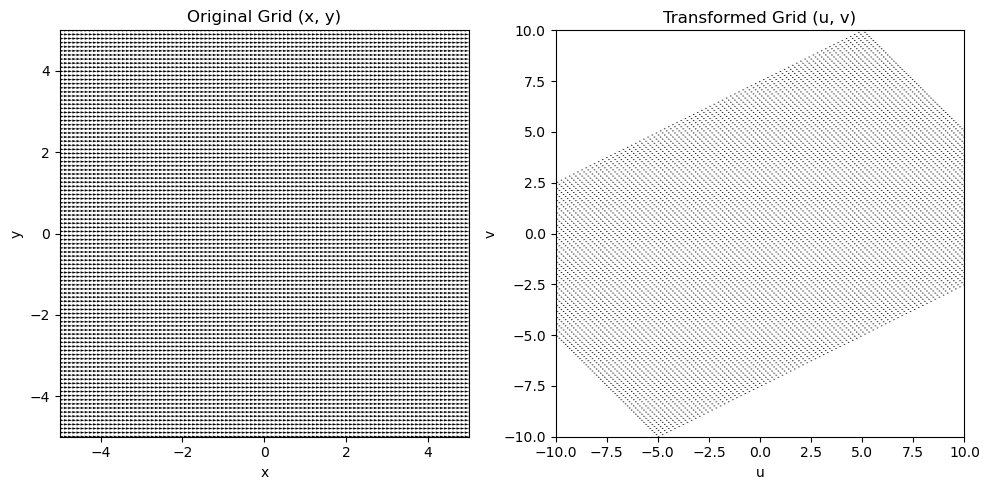

In [39]:
import numpy as np
import matplotlib.pyplot as plt


def linear_transformation(x, y):
    u = 2*x + y
    v = x - y
    return u, v


x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x_range, y_range)
u, v = linear_transformation(x, y)
# Jacobian matrix for the linear transformation
Jacobian = np.array([[2, 1],
                     [1, -1]])
plt.figure(figsize=(10, 5))
# Original grid
plt.subplot(1, 2, 1)
plt.title("Original Grid (x, y)")
plt.quiver(x, y, np.ones_like(x), np.zeros_like(y), scale=10, scale_units='xy')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("x")
plt.ylabel("y")

# Transformed grid
plt.subplot(1, 2, 2)
plt.title("Transformed Grid (u, v)")
plt.quiver(u, v, np.ones_like(u), np.zeros_like(v), scale=10, scale_units='xy')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("u")
plt.ylabel("v")

plt.tight_layout()
plt.show()

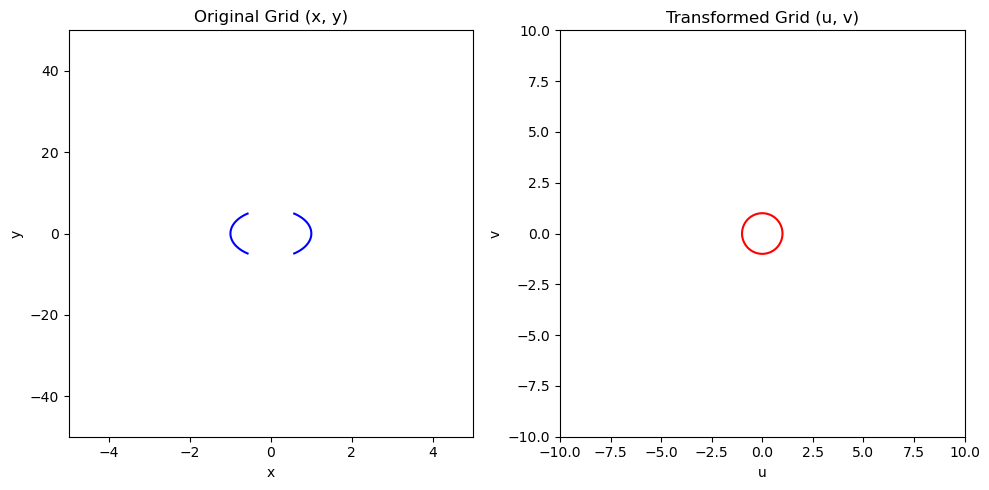

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def nonlinear_transformation(x, y):
    u = x
    v = 6 * y  # Scale the y-coordinate by a factor of 6
    return u, v


x_range = np.linspace(-5, 5, 1000)
y_range = np.linspace(-5, 5, 1000)
x, y = np.meshgrid(x_range, y_range)
u, v = nonlinear_transformation(x, y)

plt.figure(figsize=(10, 5))
# Original grid
plt.subplot(1, 2, 1)
plt.title("Original Grid (x, y)")
# Plot the original ellipse with the correct contour level
plt.contour(x, y, x**2 + (y/6)**2, levels=[1], colors='b')
plt.xlim(-5, 5)
plt.ylim(-50, 50)  # Adjust the y-coordinate range
plt.xlabel("x")
plt.ylabel("y")

# Transformed grid
plt.subplot(1, 2, 2)
plt.title("Transformed Grid (u, v)")
# Plot the transformed circle
plt.contour(u, v, u**2 + v**2, levels=[1], colors='r')
plt.xlim(-10, 10)
plt.ylim(-10, 10)  # Adjust the y-coordinate range for visualization
plt.xlabel("u")
plt.ylabel("v")

plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_14680\3513024967.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, ellipse, levels=[1], colors='b', linestyles='dashed', label='Ellipse')


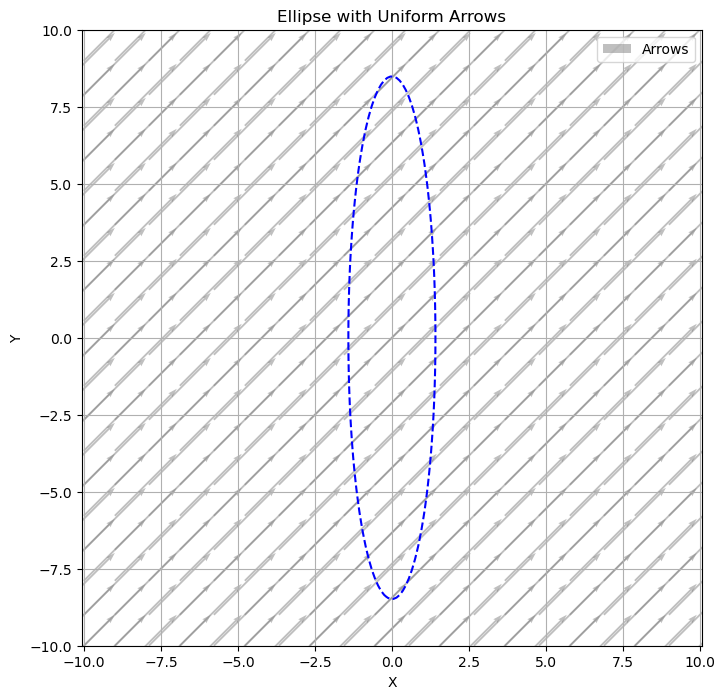

C:\Users\asus\AppData\Local\Temp\ipykernel_14680\3513024967.py:51: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(U, V, circle, levels=[1], colors='r', linestyles='solid', label='Circle')


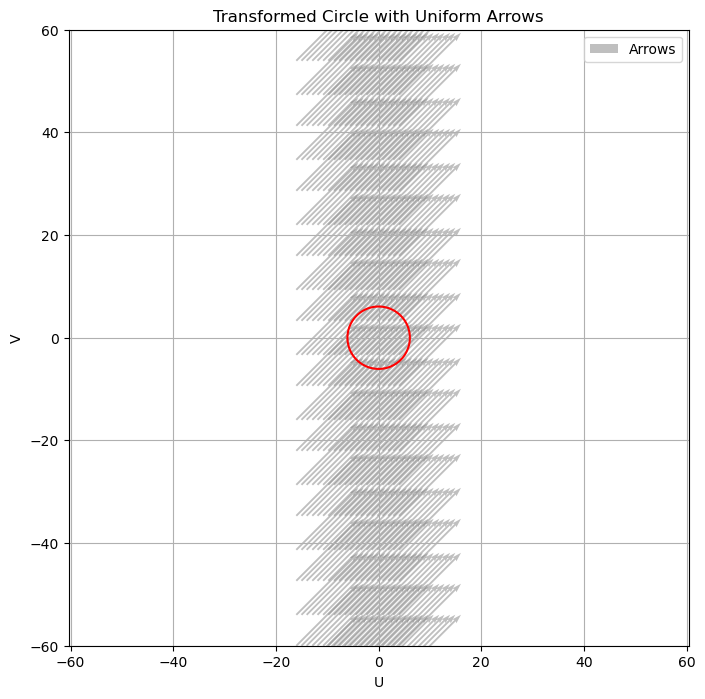

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define ellipse equation: x^2 + y^2 / 36 = 1
a = 6  # Semi-major axis length
b = 6  # Semi-minor axis length

# Generate grid
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)

# Define ellipse equation
ellipse = X**2 + Y**2 / b**2 - 1

# Define arrow properties
arrow_length = 0.5
arrow_color = 'gray'
arrow_alpha = 0.5
num_arrows = 20  # Number of arrows

# Compute arrow positions
arrow_positions = np.linspace(0, len(x) - 1, num_arrows, dtype=int)

# Apply transformation: u = x, v = 6*y
U = X
V = 6 * Y

# Define transformed circle equation
circle = U**2 + V**2 - a**2

# Define arrow directions (all pointing in a single direction)
# Change this value to -1 to reverse the direction
arrow_direction = np.array([1])

# First plot: Ellipse with uniform arrows
plt.figure(figsize=(8, 8))
plt.contour(X, Y, ellipse, levels=[1], colors='b',
            linestyles='dashed', label='Ellipse')
plt.quiver(X[arrow_positions[:, np.newaxis], arrow_positions], Y[arrow_positions[:, np.newaxis], arrow_positions],
           arrow_direction, arrow_direction,
           scale=10, pivot='mid', color=arrow_color, alpha=arrow_alpha, label='Arrows')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ellipse with Uniform Arrows')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

# Second plot: Transformed Circle with uniform arrows
plt.figure(figsize=(8, 8))
plt.contour(U, V, circle, levels=[1], colors='r',
            linestyles='solid', label='Circle')
plt.quiver(U[arrow_positions[:, np.newaxis], arrow_positions], V[arrow_positions[:, np.newaxis], arrow_positions],
           arrow_direction, arrow_direction,
           scale=10, pivot='mid', color=arrow_color, alpha=arrow_alpha, label='Arrows')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Transformed Circle with Uniform Arrows')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

The above plots demonstrate how the grid changes and figures are transformed after changing variables using the jacobian. Next we see how transforming each unit rectangle using eulers method actually gives us the area of the ellipse that is pi*a*b. This is an example case of how jacobian determinant can help us transform figures to more workable ones to find area easily

In [4]:
import numpy as np

b = 6

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)

ellipse = X**2 + Y**2 / b**2 - 1

U = X
V = 6 * Y
jacobian_det = 6
circle = U**2 + V**2 - 1

dx = x[1] - x[0]
dy = y[1] - y[0]
ellipse_area = 0.0

for i in range(len(x)-1):
    for j in range(len(y)-1):
        if ellipse[i, j] <= 0:
            ellipse_area += dx * dy

print("Approximated area of the ellipse using Euler's method: {:.2f}".format(
    ellipse_area))

circle_area = 0.0

for i in range(len(x) - 1):
    for j in range(len(y) - 1):
        if circle[i, j] <= 0:
            circle_area += dx * dy*jacobian_det  # to transform dx dy to du dv

print("Approximated area of the circle in the transformed domain: {:.2f}".format(
    circle_area))

Approximated area of the ellipse using Euler's method: 18.95
Approximated area of the circle in the transformed domain: 3.15


We see that the area of circle comes out to be nearly pi, when we will multiply this by jacobian determinat to the final area of ellipse, we will get pi*1*6 = 6pi, which is the area of ellipse. Therefore we saw how integration will work when two integrals are present and we simplify using jacobian determinant.
Int(int(complex function))=int(int(transformed function))*jacobian determinant